## Simulating pollen
The goal of this notebook is to...

In [134]:
import scipy.stats as st
import numpy as np
import pandas as pd
import toyplot, toyplot.svg

### Define a custom random variate class

This will sample values between [0-2] but has a custom PDF function that defines a probability density function so that the probability of a random variate at a given location is defined by a cosine function. 

In [198]:
class cos_gen(st.rv_continuous):
    def _pdf(self, x):
        return 1 + np.cos(np.pi * 4 * x)
    
# a pdf distribution with min,max in (0, large)
cos = cos_gen(0, a=0, b=2, name="cosine_")

### Sampled crossover data:
As a recombination map this represents very low recombination near the telomeres and centromere and high recombination in between. 

In [199]:
# sample size (crossovers)
NSNPS = 500
GENOMESIZE = int(1e7)
NGAMETES = 5000

In [200]:
# generate random numbers between 0-1 using prob dist.
np.random.seed(12345)
rsample = cos.rvs(size=NSNPS)

In [201]:
# get histogram
rhist = np.histogram(rsample, bins=int(NSNPS / 10), density=True)

In [202]:
# draw the true rate and sampled values
canvas = toyplot.Canvas(width=500, height=250)
axes = canvas.cartesian(xlabel="position", ylabel="prob. density")

# add TRUE recombination rate
axes.plot(
    np.linspace(0, GENOMESIZE, NSNPS), 
    [cos.pdf(i) for i in np.linspace(0, 1, NSNPS)],
    stroke_width=3,
);

# add histogram (magnitudes, interval_edges)
axes.bars(
    (rhist[0], rhist[1] * GENOMESIZE),
    color=toyplot.color.Palette()[1],
    opacity=0.35,
);

# add recomb rate sampled (wiggly)
axes.plot(
    np.linspace(0, GENOMESIZE, int(NSNPS/10)),
    rhist[0],
    opacity=0.5,
    stroke_width=3,
    color=toyplot.color.Palette()[1],
);

<svg class="toyplot-canvas-Canvas" height="250.0px" id="td12f4a2058174698a7327c88369320b0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 250.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> <path d="M 50.0 80.0 L 50.80160320641282 80.01902466154783 L 51.60320641282565 80.07608658159978 L 52.40480961923847 80.17114957403196 L 53.206412825651306 80.3041533541358 L 54.00801603206413 80.47501357684796 L 54.809619238476955 80.6836218902381 L 55.611222444889776 80.92984600422099 L 56.412825651302605 81.21352977444883 L 57.214428857715426 81.5344933013311 L 58.01603206412826 81.89253304411884 L 58.81763527054108 82.28742194998121 L 59.61923847695391 82.71890959799204 L 60.42084168336673 83.18672235793586 L 61.22244488977955 83.69056356383179 L 62.02404809619238 84.230113702066 L 62.82565130260521 84.80503061401282 L 63.62725450901804 85.41494971301674 L 64.42885771543087 86.05948421559668 L 65.23046092184369 86.7382253867271 L 66.03206412825651 87.45074279903933 L 66.83366733466934 88.19658460577952 L 67.63527054108216 88.9752778273496 L 68.43687374749499 89.78632865124992 L 69.23847695390782 90.62922274523308 L 70.04008016032064 91.5034255834704 L 70.84168336673346 92.40838278552451 L 71.6432865731463 93.34352046791264 L 72.4448897795591 94.30824560803777 L 73.24649298597194 95.30194642025742 L 74.04809619238478 96.32399274385043 L 74.84969939879761 97.37373644263707 L 75.65130260521042 98.450511815998 L 76.45290581162325 99.55363602103176 L 77.25450901803607 100.68240950558358 L 78.0561122244489 101.83611645186983 L 78.85771543086173 103.01402523041784 L 79.65931863727457 104.21538886403283 L 80.46092184368737 105.43944550149723 L 81.26252505010021 106.68541890070298 L 82.06412825651303 107.95251892090943 L 82.86573146292585 109.23994202381559 L 83.66733466933869 110.54687178312801 L 84.4689378757515 111.87247940230215 L 85.27054108216433 113.21592424012798 L 86.07214428857716 114.57635434382723 L 86.87374749498998 115.95290698932388 L 87.6753507014028 117.34470922834511 L 88.47695390781563 118.75087844200625 L 89.27855711422845 120.17052290052843 L 90.08016032064128 121.60274232873351 L 90.88176352705412 123.04662847695876 L 91.68336673346694 124.501265697028 L 92.48496993987976 125.96573152291505 L 93.28657314629258 127.43909725573037 L 94.08817635270542 128.92042855266052 L 94.88977955911824 130.40878601948668 L 95.69138276553107 131.9032258063066 L 96.49298597194388 133.402800206082 L 97.29458917835672 134.90655825563215 L 98.09619238476955 136.41354633869233 L 98.89779559118236 137.92280879065459 L 99.6993987975952 139.43338850460776 L 100.50100200400801 140.94432753829193 L 101.30260521042085 142.45466772158255 L 102.10420841683367 143.96345126411933 L 102.90581162324648 145.46972136269403 L 103.70741482965931 146.9725228080126 L 104.50901803607215 148.47090259044586 L 105.31062124248497 149.96391050438623 L 106.11222444889779 151.4505997508253 L 106.91382765531063 152.9300275377717 L 107.71543086172345 154.40125567812777 L 108.51703406813627 155.86335118464584 L 109.3186372745491 157.31538686158717 L 110.12024048096193 158.75644189270812 L 110.92184368737475 160.1856024252007 L 111.72344689378758 161.60196214921734 L 112.5250501002004 163.00462287261206 L 113.32665330661324 164.39269509053383 L 114.12825651302606 165.76529854951107 L 114.92985971943887 167.12156280566884 L 115.73146292585172 168.46062777672577 L 116.53306613226454 169.78164428741965 L 117.33466933867737 171.08377460801663 L 118.13627254509018 172.36619298556207 L 118.93787575150301 173.62808616753608 L 119.73947895791582 174.86865391758215 L 120.54108216432866 176.0871095229812 L 121.34268537074149 177.28268

## The parental genome
Let's assume that we sequenced 1000 SNPs ordered on a 1Mb chromosome with variable distances between them. The parental genome will be unknown but should be inferrable as phased haplotypes from the sequenced gamete data. 

In [203]:
def get_parent(genome_size, nsnps, seed):
    """
    Returns a DataFrame of parent genome genotyped at nsnps
    locations each randomly assigned a binary genotype.
    """
    # set seed
    np.random.seed(seed)

    # get nsnps random positions in genome
    rpos = np.random.choice(
        range(int(genome_size)), 
        int(nsnps), 
        replace=False
    )
    spos = sorted(rpos)

    # random binary snp genotypes 
    chrom1 = np.random.binomial(1, 0.5, int(nsnps))
    chrom2 = np.abs(1 - chrom1)

    # store position and either 0 or 1
    parent = pd.DataFrame({
        "position": spos,
        "chrom0": chrom1,
        "chrom1": chrom2,
    })
    return parent

#### get parent

In [204]:
# get parent 
parent = get_parent(genome_size=GENOMESIZE, nsnps=NSNPS, seed=123)

# show
parent.head(10)

position  chrom0  chrom1
0      1939       0       1
1      9710       1       0
2     10758       0       1
3     54315       1       0
4     84612       1       0
5    115232       0       1
6    126739       1       0
7    146995       0       1
8    170228       0       1
9    197369       0       1

### Gametes are recombinant products of the parent
Here we want to sample recombinant cross-over events with a probability over the length of the chromosome described by a cosine function with lowest probability near the ends and center. 

In [205]:
def get_gametes_cosine(parent, genome_size, ngametes, seed):
    """
    Returns an array with recombinant gamete haplotypes
    sampled from the parent where crossovers occur 
    according to a parameterized PDF.
    """
    # nsnps was already defined in parent
    nsnps = parent.shape[0]
    
    # generative PDF function
    cos = cos_gen(0, a=0, b=2, name="cosine_")
    
    # set seed
    np.random.seed(seed)

    # array to store gamete haplotypes
    arr = np.zeros((ngametes, nsnps), dtype=np.int8)
    
    # fill each row of arr with parent chrom: 11111|22222
    idx = 0
    while 1:

        # get crossover location on genome
        cv = int(genome_size * cos.rvs(size=1)[0])

        # get index of SNP left and right of crossover
        snpr = parent.loc[parent.position >= cv]
        snpl = parent.loc[parent.position < cv]

        # skip if crossover happened on the ends
        if (snpr.size == 0) or (snpl.size == 0):
            continue
        cvs = snpr.index[0]

        # random parent chrom at 5' end
        c1 = np.random.binomial(1, 0.5)
        c2 = abs(1 - c1)

        # crossover to other parent chrom at cv
        arr[idx][:cvs] = parent.iloc[:cvs, c1 + 1]
        arr[idx][cvs:] = parent.iloc[cvs:, c2 + 1]

        # pull in anc/deriv and count DMIs
        # if dead:
        #     continue
        
        # advance counter and exit
        idx += 1
        if idx == ngametes:
            break
    return arr

#### Get gametes
Here I sample 2000 gametes from a 1Mb chromosome genotyped at all of the SNP positions defined in the parent (1000 SNPs). 

In [206]:
parent

position  chrom0  chrom1
0        1939       0       1
1        9710       1       0
2       10758       0       1
3       54315       1       0
4       84612       1       0
..        ...     ...     ...
495   9928289       1       0
496   9938628       1       0
497   9965418       1       0
498   9984619       0       1
499   9987141       1       0

[500 rows x 3 columns]

In [207]:
gametes = get_gametes_cosine(parent, GENOMESIZE, NGAMETES, 123)
gametes

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int8)

### Recode gametes to represent parental genome segments
At this point we have each gamete haplotyped at many SNPS with their positions know from mapping to a reference chromosome. We do not yet know where the crossovers occurred, nor do we know the phased parent chrosomes. However, we can infer both from the gamete data. 


In [208]:
def recode_gametes(arr):
    """
    Follow a most-common path through gametes starting from 
    the first 0 genotype to recode all SNPs as coming from 
    parent genome copy 0 or 1.
    """
    # store path sequence: 0-1-0-1-1-1-0-0-1-1...
    path = np.zeros(arr.shape[1], dtype=int)
    
    # follow the most common path starting from 0
    for idx in range(1, arr.shape[1]):
        
        # mask to select sites where last base is on path
        mask = arr[:, idx - 1] == path[idx - 1]
        
        # get most common next base
        nextcol = arr[mask, idx]
        nextbase = int(round(nextcol.mean()))
        path[idx] = nextbase
        
    # recode gametes as being on or off path0
    recoded = (arr == path).astype(int)
    
    # get parent genomes
    path0 = path
    path1 = np.invert(path.astype(bool)).astype(int)
    
    return recoded, path0, path1

In [209]:
rgametes, parent0, parent1 = recode_gametes(gametes)
rgametes

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Confirm that inferred parent chroms match true

In [176]:
print(sum(parent.chrom0 == parent0))
print(sum(parent.chrom0 == parent1))
print(sum(parent.chrom1 == parent0))
print(sum(parent.chrom1 == parent1))

1000
0
0
1000


### Draw gametes haplotypes

In [177]:
def draw_gametes(arr, width=500, height=500):
    
    # get canvas and axes
    canvas = toyplot.Canvas(width=width, height=height)
    axes = canvas.cartesian()
    
    # default color palette
    c = toyplot.color.Palette()
    
    # iterate over gametes
    for idx in range(arr.shape[0]):

        # get breakpoint
        breakpoint = np.where(arr[idx] != arr[idx, 0])[0][0]

        # flip color 
        col0 = c[0]
        col1 = c[1]
        if arr[idx, 0] == 0:
            col0 = c[1]
            col1 = c[0]

        # draw gametes
        axes.rectangle(
            0, breakpoint, 
            idx, idx+1, 
            color=col0
        );
        axes.rectangle(
            breakpoint, arr.shape[1], 
            idx, idx+1,
            color=col1,
        );
    
    # style plot
    axes.x.label.text = "SNP index"
    axes.y.label.text = "gamete haplotypes"
        
    return canvas, axes

In [178]:
# draw the first 300
draw_gametes(rgametes[:300], height=600);

<svg class="toyplot-canvas-Canvas" height="600.0px" id="t3610d3ae6b514f3c9164156d6e6fada0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 600.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 500 1000 SNP index 0 100 200 300 gamete haplotypes

### Estimate recombination rate from data

In [253]:
def recomb_frequencies(rgametes, parent):
    # map crossovers to intervals (nsnps - 1)
    breakpoints = np.zeros(rgametes.shape[1] - 1, dtype=int)

    # map to interval ending at idx
    for idx in range(rgametes.shape[0]):
        breakpoint = np.where(rgametes[idx] != rgametes[idx, 0])[0][0]

        #breakpoints.append(breakpoint)
        breakpoints[breakpoint - 1] += 1
    
    # size of each inter-SNP region
    nbps = parent.position.values[1:] - parent.position.values[:-1]
    
    # get ncrossovers / length of each region
    rmap = pd.DataFrame({
        "start": parent.position.values[:-1],
        "end": parent.position.values[1:],
        "nbps": nbps,
        "crossovers": breakpoints,
        "estimate": breakpoints / nbps,
        #"rate": 
    })        

    # count proportion of recombs observed in each interval
    # ahist = breakpoints / breakpoints.max()
    return rmap

In [255]:
#recomb_frequencies(rgametes, parent)

### One function to do it all

In [256]:
def fit_recombination_rates(genome_size, nsnps, ngametes, seed):
    """
    Given a chromosome (genome_size), a number of SNP positions to
    be genotyped, and a number of gametes to be sequenced, infer 
    the recombination rate between each SNP position. Returns the
    parental genome as a pd.DataFrame and a vector of floats of 
    length nsnps as a np.ndarray.
    """
    # get diploid parent genome with random SNP positions and states
    parent = get_parent(genome_size, nsnps, seed)
    
    # get gametes from parent genome with recombination rate applied
    # as a cosine function with two cycles.
    gametes = get_gametes_cosine(parent, genome_size, ngametes, seed)
    
    # recode gametes and infer parental genomes based on the frequency
    # of bases at each site across the genotyped gametes
    rgametes, parent0, parent1 = recode_gametes(gametes)
    
    # get frequencies of crossovers between each SNP
    rmap = recomb_frequencies(rgametes, parent)
    
    return parent, rmap

### Draw by mapping intervals to genomic positions

In [241]:
def draw_recomb(parent, ahist, genome_size):
    
    # get canvas and axes
    canvas = toyplot.Canvas(width=600, height=280)
    axes = canvas.cartesian(
        xlabel="Genomic position",
        ylabel="Recombination rate (x1e-6)"
    )

    # the True recomb rate plotted at 1000 positions
    cos = cos_gen(0, a=0, b=2, name="cosine_")
    axes.plot(
        np.linspace(0, int(genome_size), 1000), 
        [cos.pdf(i) for i in np.linspace(0, 1, 1000)],
    );

    # the SNP genotyped positions
    axes.scatterplot(
        parent.position, 
        np.repeat(-0.2, parent.position.size),
        marker="|", 
        size=4,
        mstyle={"stroke-width": 0.75},
    )

    # the estimated recomb rate from the data (scaled)
    axes.plot(
        parent.position[1:], 
        ahist * 10,  
        opacity=0.15,
    );

    # smooth the estimated points 
    axes.plot(
        parent.position[1:], 
        pd.Series(ahist).rolling(window=10).mean() * 10,  
        opacity=0.5,
    );
    axes.x.ticks.show = True
    axes.y.ticks.show = True
    return canvas, axes

In [345]:
def draw_recomb(parent, rmap, genome_size):
    
    # get canvas and axes
    canvas = toyplot.Canvas(width=600, height=280)
    axes = canvas.cartesian(
        xlabel="Genomic position",
        ylabel="Recombination rate (x1e-6)"
    )

    # the True recomb rate plotted at 1000 positions
    cos = cos_gen(0, a=0, b=2, name="cosine_")
    axes.plot(
        np.linspace(0, int(genome_size), 1000), 
        [cos.pdf(i) for i in np.linspace(0, 1, 1000)],
    );

    # the SNP genotyped positions
    axes.scatterplot(
        rmap.start, 
        np.repeat(-0.2, rmap.start.size),
        marker="|", 
        size=4,
        mstyle={"stroke-width": 0.75},
    )
    
    # multiplier 
    mult = genome_size / rmap.crossovers.sum()

    # the estimated recomb rate from the data (scaled)
    axes.plot(
        rmap.start, 
        [min(5, i) for i in rmap.estimate * mult],
        opacity=0.15,
    );

    # smooth the estimated points 
    window = int(rmap.shape[0] / 50)
    axes.plot(
        rmap.start, 
        pd.Series(rmap.estimate).rolling(window=window).mean() * mult,  
        opacity=0.70,
    );
    
    # style and return
    axes.x.ticks.show = True
    axes.y.ticks.show = True
    return canvas, axes

## RESULTS

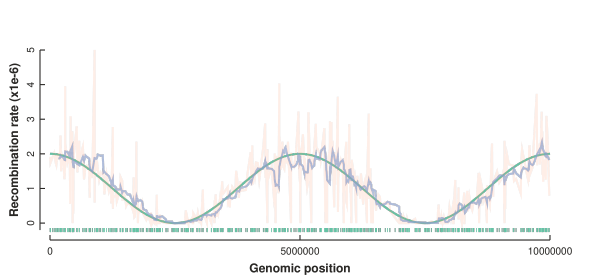

In [346]:
parent, rmap = fit_recombination_rates(1e7, 500, 5000, 123)
canvas, axes = draw_recomb(parent, rmap, 1e7)
toyplot.svg.render(canvas, "figures/recomb-fit-1e7g-500snps-5Kgams")
canvas

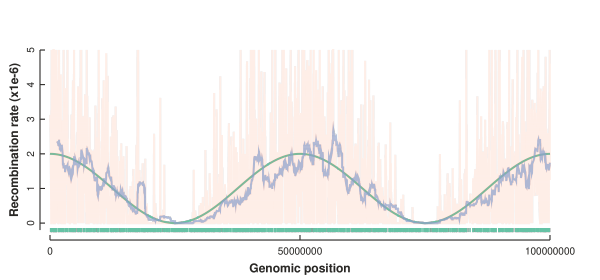

In [347]:
parent, rmap = fit_recombination_rates(1e8, 2000, 2000, 123)
canvas, axes = draw_recomb(parent, rmap, 1e8)
toyplot.svg.render(canvas, "figures/recomb-fit-1e8g-2Ksnps-2Kgams")
canvas

In [349]:
pd.Series(rmap.estimate).rolling(window=10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1994    0.000022
1995    0.000025
1996    0.000030
1997    0.000038
1998    0.000040
Name: estimate, Length: 1999, dtype: float64

### Recombination rate map (interval table)

In [70]:
# start: position of SNP to left of interval
# end: position of SNP to right of interval
# crossovers: observed crossovers in this gamete set in interval
# estimate: estimated rate as crossovers / length of interval
# rate: true rate from integral of curve in this interval

# get interval lengths
nbps = parent.position.values[1:] - parent.position.values[:-1]

rmap = pd.DataFrame({
    "start": parent.position.values[:-1],
    "end": parent.position.values[1:],
    "nbps": nbps,
    "crossovers": breakpoints,
    "estimate": breakpoints / nbps,
    #"rate": 
})

rmap.head(10)

start     end   nbps  crossovers  estimate
0   11842   13186   1344           8  0.005952
1   13186   14921   1735          10  0.005764
2   14921   17220   2299           7  0.003045
3   17220   29410  12190          49  0.004020
4   29410   44106  14696          57  0.003879
5   44106   55319  11213          44  0.003924
6   55319  112643  57324         175  0.003053
7  112643  113523    880           5  0.005682
8  113523  113874    351           0  0.000000
9  113874  118435   4561          11  0.002412

### Pooled data set
To explore the power of pooling I create a data set here of N pools of G gametes per pool. 

In [19]:
genome_size = 1e6
naliquots = 96 * 4
ngametes = 50
nsnps = 1000
seed = 123

In [20]:
def get_gamete_pools(parent, genome_size, ngametes, seed):
    np.random.seed(seed)
    aarr = np.zeros((naliquots, ngametes, nsnps), dtype=int)
    for i in range(naliquots):
        seed = np.random.randint(int(1e9))
        arr = get_gametes_cosine(parent, genome_size, ngametes, seed)
        aarr[i] = arr
        
    # normalize pool to minor freq
    aarr = aarr.mean(axis=1)
    aarr[aarr > 0.5] = 1 - aarr[aarr > 0.5]
    return aarr

#### Get gamete pools

In [21]:
# get parent 
parent = get_parent(genome_size, nsnps, seed)

# get gamete pools
pools = get_gamete_pools(parent, genome_size, ngametes, seed)

In [22]:
pools

array([[0.44, 0.44, 0.44, ..., 0.42, 0.42, 0.44],
       [0.44, 0.44, 0.44, ..., 0.44, 0.44, 0.44],
       [0.46, 0.46, 0.46, ..., 0.46, 0.46, 0.46],
       ...,
       [0.48, 0.48, 0.48, ..., 0.48, 0.48, 0.48],
       [0.44, 0.44, 0.44, ..., 0.44, 0.44, 0.44],
       [0.38, 0.38, 0.4 , ..., 0.38, 0.38, 0.38]])

#### Draw gamete pool frequencies

In [23]:
canvas = toyplot.Canvas(width=600, height=250)
axes = canvas.cartesian(xlabel="SNP index", ylabel="pool freq.")
for i in range(100):
    axes.plot(
        range(pools.shape[1]),
        pools[i],
        opacity=0.1,
        color=toyplot.color.Palette()[0]
    )

<svg class="toyplot-canvas-Canvas" height="250.0px" id="t3683be9c4bd7487e9d7a309aabb0a66b" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600.0 250.0" width="600.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> <path d="M 50.0 80.00000000000003 L 50.5 80.0 L 51.0 80.00000000000003 L 51.5 80.00000000000003 L 52.0 89.99999999999997 L 52.5 90.0 L 53.0 90.0 L 53.5 90.0 L 54.0 89.99999999999997 L 54.5 90.0 L 55.0 90.0 L 55.5 90.0 L 56.0 89.99999999999997 L 56.5 90.0 L 57.0 90.0 L 57.5 89.99999999999997 L 58.0 89.99999999999997 L 58.5 89.99999999999997 L 59.0 90.0 L 59.5 90.0 L 60.0 90.0 L 60.5 90.0 L 61.0 89.99999999999997 L 61.5 90.0 L 62.0 89.99999999999997 L 62.5 89.99999999999997 L 62.99999999999999 90.0 L 63.5 89.99999999999997 L 64.0 90.0 L 64.5 90.0 L 65.0 90.0 L 65.5 90.0 L 66.0 90.0 L 66.5 89.99999999999997 L 67.0 89.99999999999997 L 67.5 89.99999999999997 L 68.0 89.99999999999997 L 68.5 89.99999999999997 L 69.0 89.99999999999997 L 69.5 89.99999999999997 L 70.0 90.0 L 70.5 90.0 L 71.0 90.0 L 71.5 90.0 L 72.0 90.0 L 72.5 90.0 L 73.0 80.00000000000003 L 73.5 80.0 L 74.0 80.00000000000003 L 74.5 80.00000000000003 L 75.0 80.0 L 75.5 80.00000000000003 L 76.0 80.0 L 76.5 80.0 L 77.0 80.00000000000003 L 77.5 80.00000000000003 L 78.0 70.0 L 78.5 70.00000000000001 L 79.0 70.00000000000001 L 79.5 70.00000000000001 L 80.0 70.00000000000001 L 80.5 70.00000000000001 L 81.0 70.0 L 81.5 70.00000000000001 L 82.0 70.00000000000001 L 82.5 70.0 L 83.0 70.00000000000001 L 83.5 70.00000000000001 L 84.0 70.00000000000001 L 84.5 70.00000000000001 L 85.0 70.0 L 85.5 70.00000000000001 L 86.0 70.00000000000001 L 86.5 70.00000000000001 L 87.0 70.00000000000001 L 87.5 70.00000000000001 L 88.0 70.0 L 88.5 70.00000000000001 L 89.0 70.0 L 89.5 70.00000000000001 L 90.0 70.00000000000001 L 90.5 70.00000000000001 L 91.0 70.00000000000001 L 91.5 70.00000000000001 L 92.0 70.0 L 92.5 80.0 L 93.0 80.00000000000003 L 93.5 80.0 L 94.0 70.0 L 94.5 70.00000000000001 L 95.0 70.00000000000001 L 95.5 70.00000000000001 L 96.0 70.0 L 96.5 70.00000000000001 L 97.0 70.0 L 97.5 70.0 L 98.0 70.00000000000001 L 98.5 70.00000000000001 L 99.0 70.0 L 99.5 70.0 L 100.0 70.00000000000001 L 100.5 70.00000000000001 L 101.0 70.00000000000001 L 101.5 70.0 L 102.0 70.00000000000001 L 102.5 70.0 L 103.0 70.0 L 103.5 70.00000000000001 L 104.0 70.0 L 104.5 70.00000000000001 L 105.0 70.00000000000001 L 105.5 70.0 L 106.0 70.00000000000001 L 106.5 70.00000000000001 L 107.0 70.00000000000001 L 107.5 70.00000000000001 L 108.0 70.0 L 108.5 70.0 L 109.0 70.0 L 109.5 70.0 L 110.0 70.0 L 110.5 70.00000000000001 L 111.0 70.00000000000001 L 111.5 70.00000000000001 L 112.0 70.00000000000001 L 112.5 70.0 L 113.0 70.0 L 113.5 70.00000000000001 L 114.0 70.00000000000001 L 114.5 70.00000000000001 L 115.0 70.0 L 115.5 70.0 L 116.0 70.00000000000001 L 116.5 70.0 L 117.0 70.00000000000001 L 117.5 70.0 L 118.00000000000001 70.0 L 118.5 70.00000000000001 L 119.0 70.0 L 119.5 70.00000000000001 L 120.00000000000001 70.0 L 120.5 70.00000000000001 L 121.0 70.0 L 121.5 70.00000000000001 L 121.99999999999999 70.00000000000001 L 122.5 70.00000000000001 L 123.0 70.00000000000001 L 123.5 60.000000000000014 L 124.0 60.000000000000014 L 124.5 60.000000000000014 L 125.0 60.000000000000014 L 125.5 60.000000000000014 L 126.0 60.000000000000014 L 126.5 60.000000000000014 L 127.0 60.000000000000014 L 127.5 60.000000000000014 L 128.0 60.000000000000014 L 128.5 60.000000000000014 L 129.0 60.000000000000014 L 129.5 60.000000000000014 L 130.0 60.000000000000014 L 130.5 60.000000000000014 L 131.0 60.000000000000014 L 131.5 60.000000000000014 L 132.0 60.000000000000014 L 132.5 60.000000000000014 L 

#### Draw as the difference among neighboring SNPs

In [24]:
mpools = np.zeros(pools.shape)
for row in range(mpools.shape[0]):
    for idx in range(1, pools[row].size):
        mpools[row, idx] = np.abs(pools[row, idx] - pools[row, idx - 1])

In [25]:
toyplot.plot(
    range(mpools.shape[1]),
    mpools.mean(axis=0),
    height=250,
    opacity=0.6,
);

<svg class="toyplot-canvas-Canvas" height="250.0px" id="tf0fb81e2ee8f40ec873ce1dac5ca50e5" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600 250.0" width="600px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> <path d="M 50.0 200.0 L 50.5 176.23762376237596 L 51.0 180.6930693069303 L 51.5 193.3168316831683 L 52.0 153.21782178217822 L 52.5 165.84158415841563 L 53.0 190.34653465346537 L 53.5 194.8019801980198 L 54.0 175.49504950495023 L 54.5 154.7029702970296 L 55.0 197.77227722772275 L 55.5 194.8019801980198 L 56.0 188.86138613861345 L 56.5 171.03960396039582 L 57.0 160.64356435643566 L 57.5 170.29702970297006 L 58.0 198.5148514851485 L 58.5 188.86138613861388 L 59.0 196.2871287128709 L 59.5 162.12871287128712 L 60.0 181.43564356435647 L 60.5 175.49504950495052 L 61.0 191.83168316831643 L 61.5 116.83168316831674 L 62.0 88.61386138613855 L 62.5 189.60396039603958 L 62.99999999999999 194.8019801980194 L 63.5 187.37623762376202 L 64.0 158.41584158415824 L 64.5 156.93069306930695 L 65.0 171.03960396039605 L 65.5 158.41584158415844 L 66.0 87.87128712871285 L 66.5 151.73267326732656 L 67.0 192.5742574257426 L 67.5 197.77227722772275 L 68.0 191.0891089108911 L 68.5 168.81188118811883 L 69.0 171.78217821782178 L 69.5 185.8910891089109 L 70.0 191.0891089108907 L 70.5 189.6039603960396 L 71.0 200.0 L 71.5 143.5643564356436 L 72.0 156.93069306930693 L 72.5 174.00990099009903 L 73.0 173.26732673267307 L 73.5 140.59405940594053 L 74.0 190.34653465346497 L 74.5 192.57425742574256 L 75.0 179.20792079207897 L 75.5 194.0594059405937 L 76.0 162.12871287128698 L 76.5 179.20792079207922 L 77.0 148.01980198019794 L 77.5 190.34653465346537 L 78.0 185.89108910891053 L 78.5 196.28712871287092 L 79.0 194.8019801980198 L 79.5 132.4257425742574 L 80.0 177.72277227722773 L 80.5 162.87128712871285 L 81.0 199.2574257425739 L 81.5 176.98019801980175 L 82.0 173.2673267326733 L 82.5 186.6336633663363 L 83.0 146.53465346534637 L 83.5 199.25742574257424 L 84.0 193.31683168316832 L 84.5 198.5148514851485 L 85.0 156.18811881188103 L 85.5 159.15841584158403 L 86.0 191.83168316831683 L 86.5 159.90099009900993 L 87.0 166.58415841584159 L 87.5 167.32673267326737 L 88.0 185.14851485148483 L 88.5 168.81188118811863 L 89.0 149.5049504950494 L 89.5 174.00990099009883 L 90.0 178.46534653465346 L 90.5 191.0891089108911 L 91.0 187.3762376237624 L 91.5 193.3168316831683 L 92.0 197.02970297029665 L 92.5 191.0891089108911 L 93.0 197.02970297029665 L 93.5 183.66336633663332 L 94.0 163.6138613861386 L 94.5 185.89108910891053 L 95.0 182.1782178217822 L 95.5 143.5643564356436 L 96.0 194.80198019801944 L 96.5 179.9504950495046 L 97.0 185.8910891089105 L 97.5 142.82178217821783 L 98.0 187.37623762376202 L 98.5 185.14851485148515 L 99.0 192.5742574257422 L 99.5 175.49504950495052 L 100.0 191.83168316831643 L 100.5 188.86138613861385 L 101.0 185.14851485148515 L 101.5 188.86138613861348 L 102.0 196.2871287128709 L 102.5 197.77227722772236 L 103.0 200.0 L 103.5 199.99999999999957 L 104.0 194.05940594059365 L 104.5 199.99999999999957 L 105.0 186.63366336633666 L 105.5 194.8019801980194 L 106.0 197.02970297029663 L 106.5 197.77227722772275 L 107.0 196.28712871287132 L 107.5 181.43564356435647 L 108.0 197.0297029702966 L 108.5 198.5148514851485 L 109.0 189.6039603960396 L 109.5 174.00990099009903 L 110.0 193.3168316831683 L 110.5 193.31683168316792 L 111.0 196.2871287128713 L 111.5 191.83168316831683 L 112.0 198.5148514851485 L 112.5 199.25742574257384 L 113.0 193.3168316831683 L 113.5 182.92079207920753 L 114.0 196.2871287128713 L 114.5 173.26732673267327 L 115.0 196.28712871287087 L 115.5 199.25742574257424 L 116.0 197.02970297029663 L 116.5 185.8910891089105 L

# OLD THINGS

In [ ]:
xxxxxx

### Write gamete genotypes and recomb rate to a file

In [ ]:
gams = h5py.File("gams.hdf5",'w')

In [ ]:
ngametes = int(1e5)

In [ ]:
gametes = np.random.binomial(n=1, p=0.5, size=ngametes)

In [ ]:
gametes

In [ ]:
# gams.create_dataset(
#     "start_haplo",
#     data=np.random.binomial(1,.5,size=num_gams),
#     dtype=np.int8)

In [ ]:
ncrsv = 1 + np.random.binomial(n=1, p=0.2, size=ngametes)
ncrsv

In [ ]:
np.sum(ncrsv)

In [ ]:
#crsvs = 

for i in range(ngametes):
    


In [ ]:
gams.create_dataset(
    "crossovers",
    data=np.vstack([
        np.hstack([
            np.repeat(i,gams['num_crossovers'][i]) 
             for i in range(num_gams)]
        ),
        my_cv.rvs(size=np.sum(gams["num_crossovers"]))]).T)

In [ ]:
gams.close()

### make our aliquots:

In [ ]:
gams = h5py.File("gams.hdf5",'r')

In [ ]:
# num gams per aliquot
gpa = 10

# num aliquots
nali = 500

In [ ]:
samp_arr = np.random.choice(range(gams['num_crossovers'].shape[0]),
                 size=gpa*nali,
                 replace=False).reshape((nali,gpa))

In [ ]:
with h5py.File("samp_arr.hdf5","w") as f:
    f.create_dataset("samp_arr",
                    data=samp_arr,
                    dtype=np.int64)

In [ ]:
gams.close()

In [ ]:
# number of cut sites per genome (we can assign specific locations later)
ncutsites = 100

In [ ]:
samp_arr

### make some sequencing functions...

In [ ]:
@njit
def get_read(arr,
             ncutsites,
            ):
    """
    arr is shape aliquots x gamete indexes
    this fuction returns the aliquot number, the gamete index, and the cut site index (from 0 to `ncutsites`)
    """
    alinum = np.random.randint(arr.shape[0])
    colnum = np.random.randint(arr.shape[1])
    gamidx = samp_arr[alinum,colnum]
    cutsiteidx = np.random.randint(ncutsites)
    return(alinum, gamidx, cutsiteidx)

In [ ]:
@njit
def do_sequencing(arr, ncutsites, num_reads):
    seqarr = np.zeros((num_reads,3),dtype=np.int64)
    for rowidx in range(num_reads):
        seqarr[rowidx] = get_read(arr,ncutsites)
    return(seqarr)

### sequencing time!

In [ ]:
samp_arr_file = h5py.File("samp_arr.hdf5","r")

In [ ]:
samp_arr = samp_arr_file['samp_arr']

In [ ]:
num_reads = int(1e7)

In [ ]:
with h5py.File("seqs.hdf5",'w') as f:
    f.create_dataset("seqarr",
                    data=do_sequencing(samp_arr,ncutsites,num_reads),
                    dtype=np.int64)

In [ ]:
seqh5 = h5py.File("seqs.hdf5",'r')

### "demultiplex" and "align" the sequences into an hdf5 file with aliquots at the surface level and locus # at the next level down.

In [ ]:
seqs_reshape = h5py.File('seqs_reshape.hdf5','w')
for alinum in range(nali):
    tmpgroup = seqs_reshape.create_group(str(alinum))
    for locusnum in range(ncutsites):
        alisamp = np.take(seqh5['seqarr'],np.where(seqh5['seqarr'][:,0] == alinum),axis=0)[0]
        gams_seqed = np.take(alisamp,np.where(alisamp[:,2] == locusnum),axis=0)[0][:,1]
        
        tmpgroup.create_dataset(str(locusnum),
                          dtype=np.int64,
                          data = gams_seqed)

In [ ]:
seqs_reshape.close()

### now assign each read to a haplotype!

### this is the main bottleneck for the whole code process...

In [ ]:
gams = h5py.File("gams.hdf5",'r')

In [ ]:
crossarr = gams['crossovers']
haplostart = gams['start_haplo']

In [ ]:
seqs_reshape = h5py.File('seqs_reshape.hdf5','r')

In [ ]:
haplotypes = h5py.File('haplotypes.hdf5','w')

In [ ]:
@njit
def convert_haplo(n,s):
    s_ = s
    for i in range(n):
        s_ = 1-s_
    return(s_)

In [ ]:
np.take()

In [ ]:
for ali_idx_ in range(500):
    tmpgroup = haplotypes.create_group(str(ali_idx_))
    for locus_idx_ in range(ncutsites):
        
        readidxs = seqs_reshape[str(ali_idx_)][str(locus_idx_)]
        readloc = locus_idx_ / ncutsites
        haplos = []
        for readidx in readidxs:
            crosses = np.take(crossarr[:,1],np.where(crossarr[:,0] == readidx))[0]
            #crosses = crossarr[crossarr[:,0] == readidx,1]
            starter = np.take(haplostart,
                              readidx)
            
            passes = np.sum(readloc > crosses)
            #read_haplo = starter
            #for i in range(passes):
            #    read_haplo = 1-read_haplo
            
            haplos.append(convert_haplo(passes,starter))
        
        tmpgroup.create_dataset(str(locus_idx_),
                          dtype=np.int64,
                          data = haplos)
    print(ali_idx_)

In [ ]:
haplotypes.close()

### now compare!

In [ ]:
haplotypes = h5py.File('haplotypes.hdf5','r')

In [ ]:
np.mean(haplotypes['10']['15'])

In [ ]:
ali_mean_arr = np.zeros((nali,ncutsites))
for ali_idx_ in range(500):
    #currgam_arr = np.take(seqh5['seqarr'][:,1:],np.where(seqh5['seqarr'][:,0] == ali_idx_),axis=0)[0]
    ali_means = np.zeros((ncutsites))
    for locus_idx_ in range(ncutsites):
        #readidxs = seqh5['seqarr'][np.alltrue(
        #    np.array(seqh5['seqarr'])[:,[0,2]] == [ali_idx_,locus_idx_],
        #             axis=1),
        #                           1]
        haps = haplotypes[str(ali_idx_)][str(locus_idx_)]

        ali_means[locus_idx_] = np.mean(haps)
    ali_mean_arr[ali_idx_,:] = ali_means
    print(ali_idx_)

In [ ]:
var_norm_dists = np.zeros((500,ali_mean_arr.shape[1]-1))
for rowidx in range(500):
    for colidx in range(ali_mean_arr.shape[1]-1):
        var_norm_dists[rowidx,colidx] = (np.abs(ali_mean_arr[rowidx][colidx]-ali_mean_arr[rowidx][colidx+1])/np.var(ali_mean_arr[rowidx]))

In [ ]:
# 500 rows
sns.scatterplot(range(99),np.mean(var_norm_dists,axis=0))